# Quantum Fourier Transform (QFT) 

[Reference](https://community.qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)

Fourier transform is a very important tool to signal processing. 

Here we will build a quantum version of a discrete fourier transform, this will be used in many quantum algorithms.

Discrete fourier transform is the map between two strings $F: (x_0, x_1, \dots, x_{N-1}) \rightarrow ((y_0, y_1, \dots, y_{N-1}))$.

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

Quantum Fourier transform does the same thing, but using quantum states: $F:\sum_{i=0}^{N-1} x_i\left| i \right> \rightarrow \sum_{i=0}^{N-1} y_i\left| i \right> $

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

This can be represented by an unitary matrix:
\begin{equation}
F = \frac{1}{\sqrt N} \sum_{x=0}^{N-1}\sum_{y=0}^{N-1} \omega_N^{lk}  \left| y \right> \left< x \right|
\end{equation}



To find the circuit representation of the Fourier transform we need to see how it works on $2^N$ qubits first:

\begin{equation}
\begin{split}
F\left(\left| m \right> _n\right) & = \frac{1}{\sqrt N} \sum_{k=0}^{N-1} \omega_N^{km} \left| k \right>_n \\
  & =  \frac{1}{\sqrt N} \sum_{k=0}^{N-1} exp\left( i \frac{2\pi}{N} mk \right) \left| k \right>_n  \\
  & =  \frac{1}{\sqrt N} \sum_{k_{n-1}=0}^{1} \dots \sum_{k_{0}=0}^{1} exp\left( i \frac{2\pi}{N} m \sum_{l=1}^n \frac{k_{n-l}}{2^l} \right) \left| k_{n-1} \dots k_0 \right>_n  \\
  & =  \frac{1}{\sqrt N} \sum_{k_{n-1}=0}^{1} \dots \sum_{k_{0}=0}^{1} \bigotimes_{l=1}^n exp\left( i \frac{2\pi}{N} m  \frac{k_{n-l}}{2^l} \right) \left| k_{n-l}\right>_n \\ 
  & =  \frac{1}{\sqrt N} \bigotimes_{l=1}^n \left[ \left| 0 \right> + exp\left( i \frac{2\pi m}{2^l} \right) \left| 1\right> \right]
\end{split}
\end{equation}
Now we use the binary representation of $\frac{m}{2^l}$: 
\begin{equation}
\begin{split}
\frac{m}{2^l} & = \sum_{p=1}^n m_{n-p} 2^{n-p-l}  = m_{n-1} 2^{n-1-l} + \dots + m_l 2^0 + \dots + m_0 2^{-l} & \equiv m_{n-1} \dots m_l . m_{l-1} \dots m_0 \\
 & = \sum_{p=1}^{n-l} m_{n-p} 2^{n-p-l} + \sum_{p=1}^{l} \frac{m_{l-p}}{2^l}  &
\end{split}
\end{equation}
Therefore:
\begin{equation}
	exp\left[ i \frac{2 \pi m}{2^l} \right] = exp\left[ i 2 \pi \sum_{p=1}^{n-l} m_{n-p} 2^{n-p-l} \right] exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] = exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right]
\end{equation}
Now, we have that:
\begin{equation}
F(\left| m\right>_n) = \frac{1}{\sqrt{N}} \bigotimes_{l=1}^n \left[ \left| 0 \right> +exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] \left| 1\right> \right]
\end{equation}

Consider first acting on 2 qubits(n=2):

\begin{equation}
\begin{split}
F(\left| m\right>_n) & =  \frac{1}{\sqrt{4}} \bigotimes_{l=1}^2 \left[ \left| 0 \right> +exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] \left| 1\right> \right] \\
 & = \frac{1}{2} \left[ \left| 0 \right> +exp\left[i 2 \pi  0.m_0 \right] \left| 1\right>\right] \otimes \left[ \left| 0 \right> +exp\left[i 2 \pi  0.m_1m_0 \right] \left| 1\right>\right]
\end{split}
\end{equation}

Consider the following gate:

\begin{equation}
\begin{split}
R_k^{(0,1)} \left| m \right> \left| 0 \right> & =  & \left| 0 \right> \\
R_k^{(0,1)} \left| m \right> \left| 1 \right> & = & exp \left[ i 2 \pi \frac{m}{2^k} \right]   \left| 1 \right> 
\end{split}
\end{equation}

We can write the QFT as: 

\begin{equation}
F = SWAP[H^{(0)} R_2^{(0,1)} H^{(1)} \left| m \right>_2]
\end{equation}

Where the SWAP gate changes the order of the qubits. 

This can be easily generalized for N qubits as we can see below.

In [61]:
%matplotlib inline
import qiskit as qsk
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## N = 1

### Circuit

In [62]:
Q_Circuit = qsk.QuantumCircuit(1)

In [63]:
Q_Circuit.h(0);

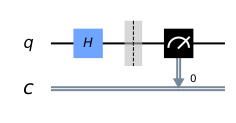

In [64]:
circ_meas = qsk.QuantumCircuit(1, 1)
circ_meas.barrier(range(1))
circ_meas.measure(qubit=0,cbit=0)
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [65]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'0': 507, '1': 517}


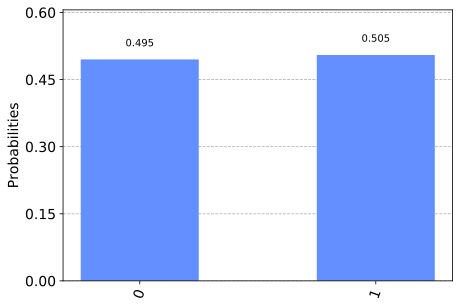

In [66]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## N = 2

### Circuit

In [67]:
Q_Circuit = qsk.QuantumCircuit(2)

In [68]:
Q_Circuit.h(1);
Q_Circuit.cu1(np.pi,0,1);
Q_Circuit.barrier()
Q_Circuit.h(0);
Q_Circuit.barrier();
Q_Circuit.swap(0,1);

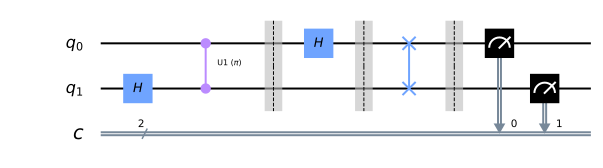

In [69]:
circ_meas = qsk.QuantumCircuit(2, 2)
circ_meas.barrier();
circ_meas.measure(range(2),range(2));
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [70]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'00': 253, '01': 278, '11': 229, '10': 264}


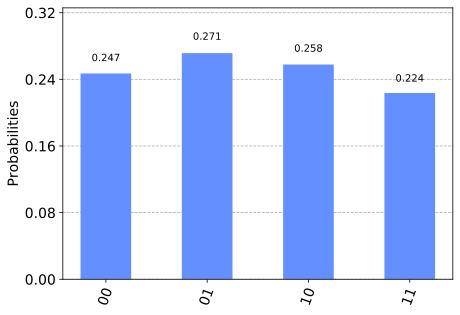

In [71]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## N = 3

### Circuit

In [72]:
def Rk(QC, Q_CONTROL, Q_TARGET, k, a):
    QC.cu1( a*2.0*np.pi/2.0**k, Q_CONTROL, Q_TARGET);

In [73]:
n = 3
Q_Circuit = qsk.QuantumCircuit(n)

for i in range(n):
    m = n - 1 - i;
    Q_Circuit.h(m);
    for j in range(m, 0, -1):
        k = 2 + m - j;
        Rk(Q_Circuit, j-1, m, k, 1.0);
    Q_Circuit.barrier();

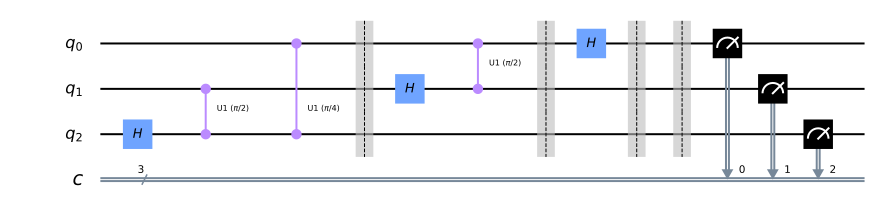

In [74]:
circ_meas = qsk.QuantumCircuit(n, n)
circ_meas.barrier();
circ_meas.measure(range(n),range(n));
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [75]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'000': 121, '101': 121, '110': 140, '001': 143, '100': 117, '011': 112, '111': 142, '010': 128}


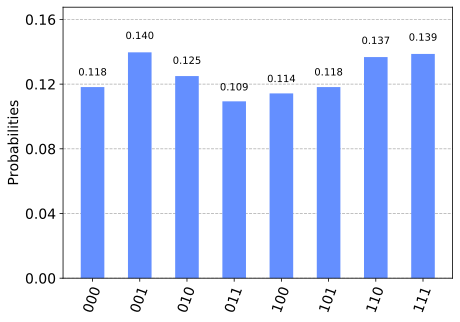

In [76]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Generalization for any N

## Defining rotations

In [77]:
def qft_rotations(circuit, n):
    """ Defines the rotations necessary for the QFT
    in a recursive manner.

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    n(int): qubit to do the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.

    """
    for i in reversed(range(n)):
        circuit.h(i)
        for qubit in range(i):
            circuit.cu1(np.pi/float(2**(i-qubit)), qubit, i)    
    return circuit    

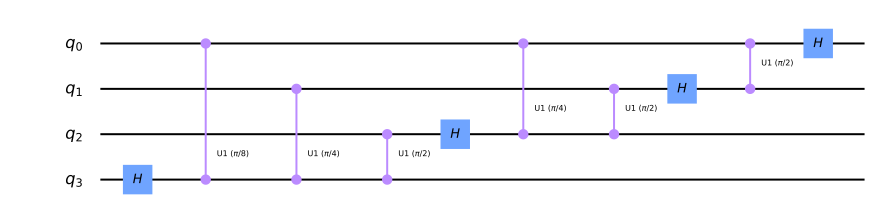

In [81]:
qc = qsk.QuantumCircuit(4)
qft_rotations(qc, 4)
qc.draw('mpl')

## Making the swaps

In [82]:
def qft_swap(circuit, n):
    """Swap registers for the QFT.
    
    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    n(int): qubit to do the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    """
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

## Full QFT

In [83]:
def QFT(circuit, n):
    """ QFT on a circuit.

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    n(int): qubit to do the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    
    """
    qft_rotations(circuit,n)
    qft_swap(circuit, n)
    return circuit

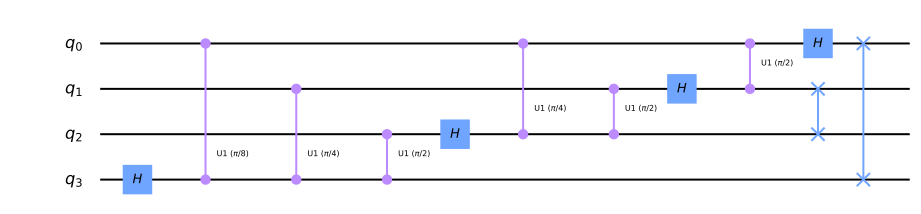

In [84]:
qc = qsk.QuantumCircuit(4)
QFT(qc, 4)
qc.draw('mpl')

## N = 4

### Circuit

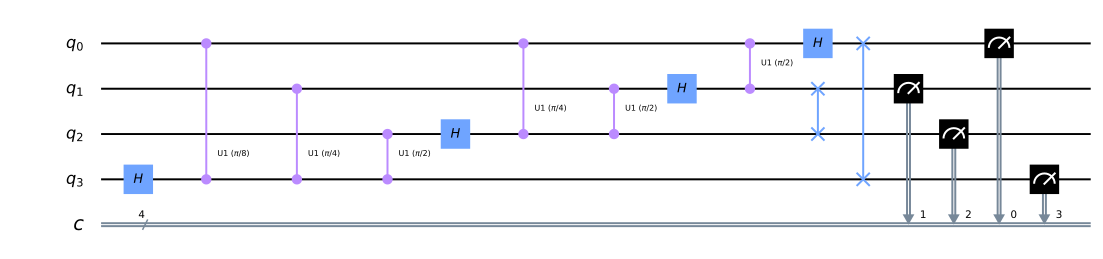

In [85]:
N = 4
qc = qsk.QuantumCircuit(N,N)
QFT(qc, N)
qc.measure(range(N),range(N))
qc.draw(output='mpl')

### Simulation

In [86]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

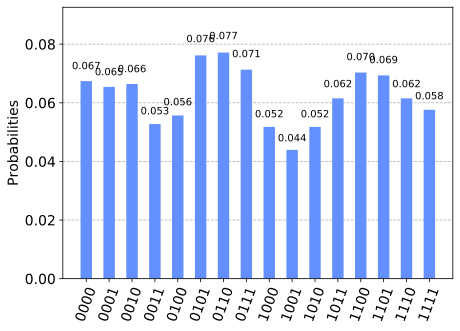

In [87]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Defining the inverse QFT

Since the QFT is unitary, we have a reverse such that $QFT^{\dagger}QFT = I$. In qiskit this can be done in a elegant manner.

In [88]:
def qft(circuit,n):
    """QFT. 

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    n(int): qubit to do the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    
    """
    qft_circuit= QFT(qsk.QuantumCircuit(n, name='QFT'), n)
    circuit.append(qft_circuit, circuit.qubits[:n])
    return circuit.decompose()

In [89]:
def inverse_QFT(circuit,n):
    """ Inverse QFT. 

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    n(int): qubit to do the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    
    """
    qft_circuit= QFT(qsk.QuantumCircuit(n, name='QFT'), n)
    inverseqft = qft_circuit.inverse()
    circuit.append(inverseqft, circuit.qubits[:n])
    return circuit.decompose()

Let's show that the inverse_QFT is indeed the inverse

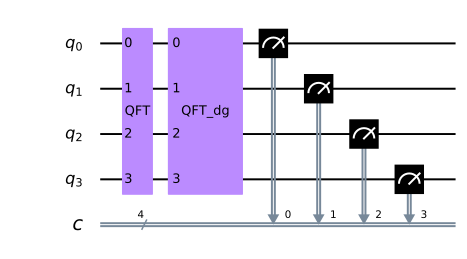

In [90]:
N = 4
qc = qsk.QuantumCircuit(N,N)
qft(qc, N)
inverse_QFT(qc,N)
qc.measure(range(N),range(N))
qc.draw('mpl')

### Simulation

In [91]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

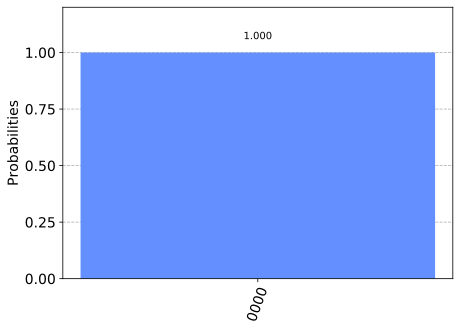

In [92]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

----------------------------------------------------------------------------------------------------

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table